# Project - Logical Arcitecture Elements Study 

This is a study that will use properties in the a Capella model to perform a study on the number of solar panels required to satisfy various a few usage scenarios.

Access the System Model that is in GitHUB folder with a python module "caplellambse" that can read and modify the SMW/Capella model content.

In [1]:
import capellambse
import ipywidgets as widgets
from IPython.core.display import HTML
import numpy as np
import pandas as pd 
from IPython.display import Markdown

resources = {
    "Trail_Power_for_Campgrounds": "Trail_Power_for_Campgrounds/Trail Power for Campgrounds",
}
path_to_model = "../Trail Power.aird"
model = capellambse.MelodyModel(path_to_model, resources=resources)

Display a diagram from the capella module with parameters being accessed. Note that this diagram is not being pulled dynamically, due to the desire to see the parameters on the diagram. It is pulling a snapshot of a .jpg diagram.

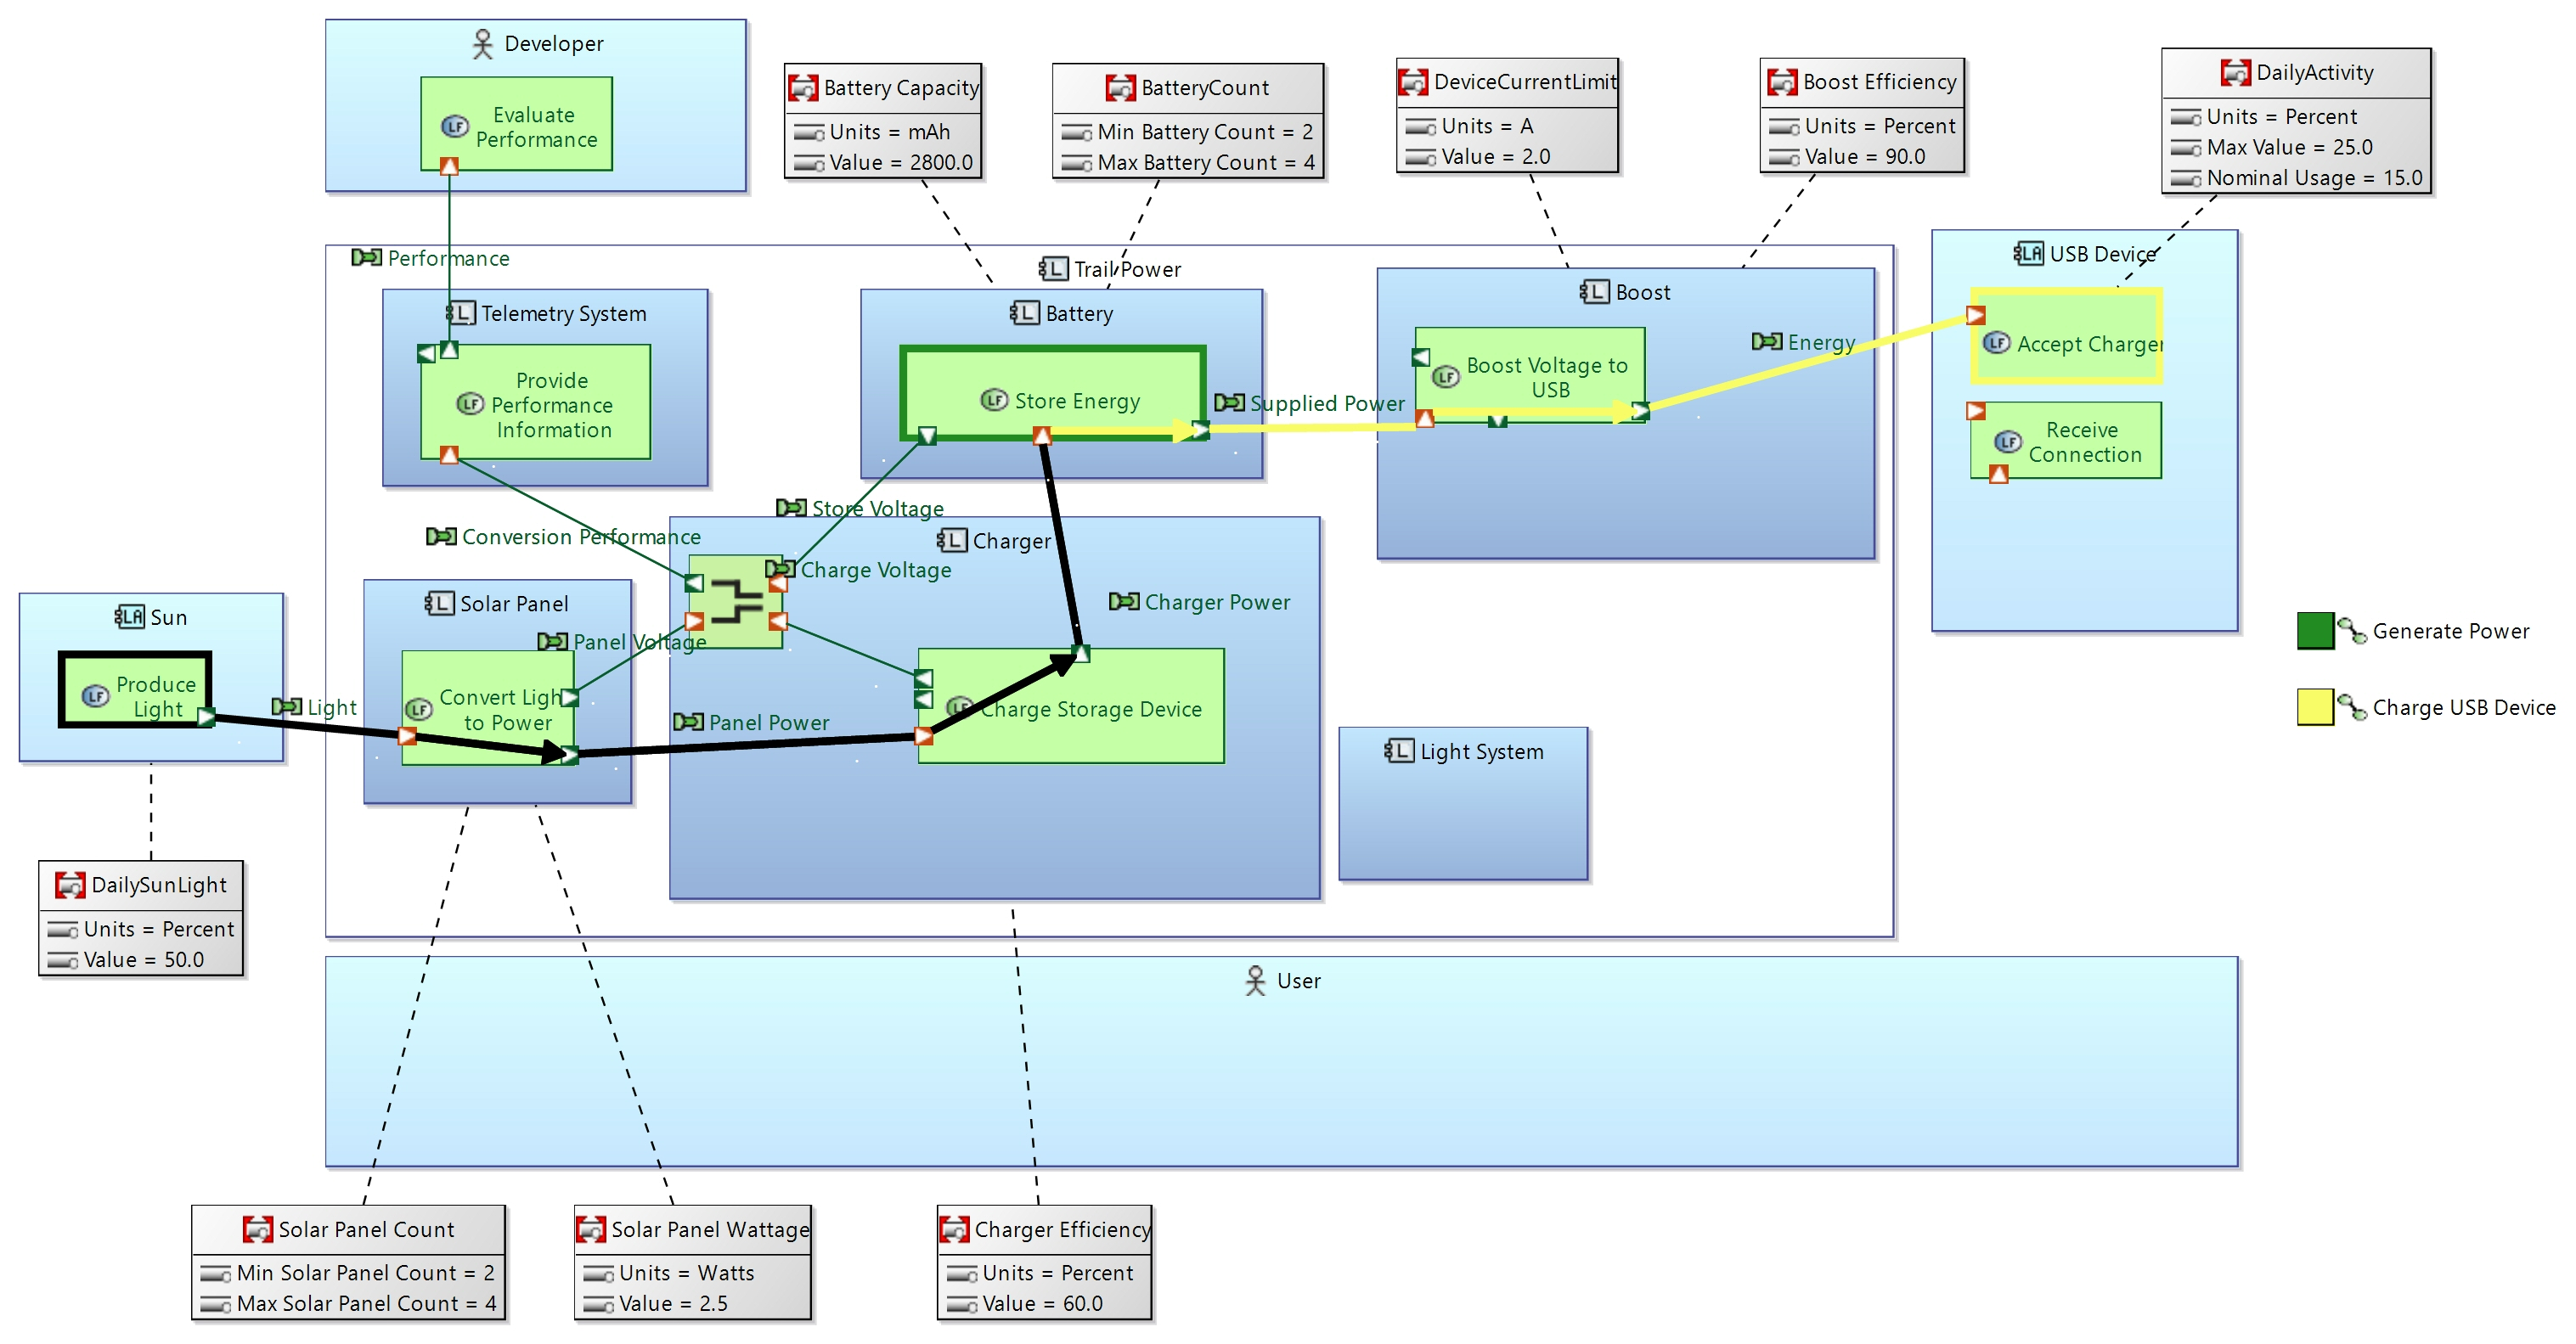

In [2]:
from IPython import display as diag_display
diag_display.Image("../Images/[LAB] Trail Power (Charge) Properties.jpg")


## Display of all the parameters and respective components/functions in the logical architecture
The following is a report of all the parameters avialable to be used from the logical architecture. 

In [3]:
la_model = model.la 

df = pd.DataFrame({
    'Logical Function': [],
    'Property Value Group Name': [],
    'Propery Name': [],
    'Property Value': [],
    })

for function in la_model.all_functions:
    for pvg in  function.applied_property_value_groups :
        for pv in  pvg.property_values:
            #print("LogicalFunction=",'"' +function.name+ '"',"property_value_groups=",'"' +pvg.name+ '"','"Property Name"=','"' +pv.name+ '"','"Value"=',pv.value )
            df.loc[len(df)] = [function.name,pvg.name,\
                                pv.name, pv.value]
display(df)
df = pd.DataFrame({
    'Logical Component': [],
    'Property Value Group Name': [],
    'Property Name': [],
    'Property Value': [],
    })
for component in la_model.all_components:
    for pvg in  component.applied_property_value_groups :
        for pv in  pvg.property_values:
            #print("LogicalComponents=",'"' +component.name+ '"',"property_value_groups=",'"' +pvg.name+ '"','Property Name=','"' + pv.name + '"','Value=',pv.value  )
            df.loc[len(df)] = [component.name,pvg.name,\
                                pv.name, pv.value]
display(df)

Logical Function Property Value Group Name   Propery Name Property Value
0   Accept Charger             DailyActivity          Units        Percent
1   Accept Charger             DailyActivity      Max Value           25.0
2   Accept Charger             DailyActivity  Nominal Usage           15.0

Logical Component Property Value Group Name          Property Name  \
0              Boost          Boost Efficiency                  Units   
1              Boost          Boost Efficiency                  Value   
2              Boost        DeviceCurrentLimit                  Units   
3              Boost        DeviceCurrentLimit                  Value   
4            Battery          Battery Capacity                  Units   
5            Battery          Battery Capacity                  Value   
6            Battery              BatteryCount      Min Battery Count   
7            Battery              BatteryCount      Max Battery Count   
8        Solar Panel       Solar Panel Wattage                  Units   
9        Solar Panel       Solar Panel Wattage                  Value   
10       Solar Panel         Solar Panel Count  Min Solar Panel Count   
11       Solar Panel         Solar Panel Count  Max Solar Panel Count   
12           Charger        Charger Efficiency                  Units   
13           Charger        Charger Efficiency                  Value   
14               Sun             DailySunLight                  Units   
15               Sun             DailySunLight                  Value   

   Property Value  
0         Percent  
1            90.0  
2               A  
3             2.0  
4             mAh  
5          2800.0  
6               2  
7               4  
8           Watts  
9             2.5  
10              2  
11              4  
12        Percent  
13           60.0  
14        Percent  
15           50.0

In [23]:
import yaml

chg = model.search("LogicalComponent").by_name("Charger")
#print(chg)
chg_state_machine = chg.state_machines[0]
pprint(chg_state_machine)
#print(chg_state_machine.regions[0])
#chg_state_machine_dict = chg_state_machine.to_dict()
#print(chg_state_machine_dict)
help(chg_state_machine)

<StateMachine 'StateMachine 1' (929694e0-6c8a-41ac-8fd9-2912c0dfb40a)>
.applied_property_value_groups = []
.applied_property_values = []
.constraints = []
.description = Markup('')
.diagrams = []
.filtering_criteria = []
.layer = <LogicalArchitecture 'Logical Architecture' (29ed9671-e582-4336-bec3-3be0c1ca1f64)>
.name = 'StateMachine 1'
.parent = <LogicalComponent 'Charger' (6d0bef31-bc7a-4c2a-a484-fc630b700024)>
.progress_status = 'NOT_SET'
.property_value_groups = []
.property_value_packages = []
.property_values = []
.pvmt = <Property Value Management for <StateMachine 'StateMachine 1' (929694e0-6c8a-41ac-8fd9-2912c0dfb40a)>>
.regions = [0] <Region 'Default Region' (e6f6f622-f38c-41e2-9198-14ee999df78c)>
.requirements = []
.summary = ''
.traces = []
.uuid = '929694e0-6c8a-41ac-8fd9-2912c0dfb40a'
.validation = <capellambse.extensions.validation._validate.ElementValidation object at 0x7f11f6378450>
.xtype = 'org.polarsys.capella.core.data.capellacommon:StateMachine'
<Region 'Default R

In [5]:
from bs4 import BeautifulSoup

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()


df = pd.DataFrame({
    'Logical Function': [],
    'Constraint': [],
    })

for function in la_model.all_functions:
    for constraint in function.constraints:

        df.loc[len(df)] = [function.name,\
                                strip_html_tags(str(constraint.specification))]
display(df)
df = pd.DataFrame({
    'Logical Component': [],
    'Constraint': [],
    })
for component in la_model.all_components:
    for constraint in component.constraints:
        df.loc[len(df)] = [component.name,\
                                strip_html_tags(str(constraint.specification))]
pd.set_option('display.max_colwidth', 200)  # Set the maximum column width

display(df)

Logical Function                                         Constraint
0  Charge Storage Device    Chareger Power = Power *  Charger Efficiency = 
1           Store Energy  Stored Energy(t) = Integral(Charger Power(t)) ...
2   Boost Voltage to USB  Supplied Power(t) =( 5.0 Volts * DeviceCurrent...

Logical Component  \
0       Solar Panel   

                                                            Constraint  
0  Panel Power(t) = Solar Panel Count * Solar Panel Wattage * Light(t)

The following code can be used in the study to retrive the value from the model to use in the study.

your_variable = model.search("LogicalFunction").by_name("Name of Function").property_value_groups["Name of property Value Group"]["Name of Property"])

your_variable = model.search("LogicalComponent").by_name("Name of Component").property_value_groups["Name of property Value Group"]["Name of Property"])

You can see an example below.

In [6]:
print( "Battery Size" , model.search("LogicalComponent").by_name("Battery").property_value_groups["Battery Capacity"]["Value"] ,\
"Units:" ,model.search("LogicalComponent").by_name("Battery").property_value_groups["Battery Capacity"]["Units"])

Battery Size 2800.0 Units: mAh


# Analysis by Functional Chain
Typically analysis could be done by functional chain. You may even want leverage content of the model to define variable in your study.

Note: Currently functional chains nested within Functional Chains are not supported.

In [7]:
def build_fc_table(fc ,df , parent_chain ) :
    #print(fc)
    #print("Functional Chain:", fc.name)
    display(Markdown(f"# Functional Chain: {fc.name}"))



    def Append_Row_to_Dataframe(df, Current_Parent_Chain , Current_Function_Owner ,Current_Function,\
                               Current_Function_Exchange , Current_Function_Exchange_EI, Current_Function_Exchange_EIE) :
        df.loc[len(df)] = [Current_Parent_Chain, Current_Function_Owner ,Current_Function,\
                                Current_Function_Exchange , Current_Function_Exchange_EI, Current_Function_Exchange_EIE]
        return df
    for function in fc.involved_functions:
        #This will initialize all the table elements
        Current_Parent_Chain = parent_chain
        Current_Function_Owner = ''
        Current_Function =''
        Current_Function_Exchange = ''
        Current_Function_Exchange_EI = ''
        Current_Function_Exchange_EIE = ''
        
        #print(function.owner)
        if function.owner != None :
         
            Current_Function_Owner=function.owner.name
            #print("- Entity:",Current_Function_Owner)
            #print("-Function:",function.name)
            Current_Function = function.name
            #print("-Function:",Current_Function)
           
            
            #print("---Exch:",exchange.name)
            for output in function.outputs:
               # print(output)
                is_FOs= True
                Current_Function_OPort = output.name
                #Append_Row_to_Dataframe(df,  Current_Function_Owner ,Current_Function,\
                #                 Current_Function_Exchange , Current_Function_Exchange_EI, Current_Function_Exchange_EIE)
                for exchange in output.exchanges:         
                    for involved_exchange in fc.involved_links:
                         if exchange == involved_exchange:
                             Current_Function_Exchange = exchange.name
                             #print("--Output:",output.name)
                             #print("---Exch:",Current_Function_Exchange)
                             
                             for exchange_item in exchange.exchange_items: 
                                 Current_Function_Exchange_EI = exchange_item.name
                                 #print("--Output:",output.name)
                                 #print(exchange_item)
                                 #print("---Exch Item:",Current_Function_Exchange_EI)

                                 for element in exchange_item.elements: 
                                     Current_Function_Exchange_EIE = element.name
                                     #print(element)
                                     #print("---Exch Item Elements:",Current_Function_Exchange_EIE)
                                     df = Append_Row_to_Dataframe(df,    Current_Parent_Chain, Current_Function_Owner ,Current_Function,\
                                        Current_Function_Exchange , Current_Function_Exchange_EI, Current_Function_Exchange_EIE)
                                 if  exchange_item.elements ==  []:
                                     df =Append_Row_to_Dataframe(df, Current_Parent_Chain, Current_Function_Owner ,Current_Function,\
                                    Current_Function_Exchange , Current_Function_Exchange_EI, Current_Function_Exchange_EIE) 
                             if exchange.exchange_items == [] :
                                df = Append_Row_to_Dataframe(df, Current_Parent_Chain, Current_Function_Owner ,Current_Function,\
                                Current_Function_Exchange , Current_Function_Exchange_EI, Current_Function_Exchange_EIE) 
          
        else: 
            Current_Function_Owner="None"
            print("-Entity","None")
            Current_Function = function.name
            print("-Function",Current_Function )

            for output in function.outputs:  
                Current_Function_OPort = output.name
                Current_Function_OPort = output.name
                #Append_Row_to_Dataframe(df,  Current_Function_Owner ,Current_Function,\
                #    Current_Function_Exchange , Current_Function_Exchange_EI, Current_Function_Exchange_EIE)
                for exchange in output.exchanges:
                   for involved_exchange in fc.involved_links:
                         if exchange == involved_exchange:
                             
                             
                             Current_Function_Exchange = exchange.name
                             #print("--Output:",output.name)
                             #print("---Exch:",Current_Function_Exchange)
                             if exchange.exchange_items == [] :
                                 df = Append_Row_to_Dataframe(df, Current_Parent_Chain, Current_Function_Owner ,Current_Function,\
                                 Current_Function_Exchange , Current_Function_Exchange_EI, Current_Function_Exchange_EIE)   
                             for exchange_item in exchange.exchange_items: 
                                 Current_Function_Exchange_EI = exchange_item.name
                                 #print("--Output:",output.name)
                                 #print(exchange_item)
                                 #print("---Exch Item:",Current_Function_Exchange_EI)
                                 
                                 
                                 for element in exchange_item.elements: 
                                     Current_Function_Exchange_EIE = element.name
                                     #print(element)
                                     #print("---Exch Item Elements:",Current_Function_Exchange_EIE)
                                     df = Append_Row_to_Dataframe(df,Current_Parent_Chain,  Current_Function_Owner ,Current_Function,\
                                       Current_Function_Exchange , Current_Function_Exchange_EI, Current_Function_Exchange_EIE)
                                 if exchange_item.elements == []:
                                     df = Append_Row_to_Dataframe(df, Current_Parent_Chain, Current_Function_Owner ,Current_Function,\
                                    Current_Function_Exchange , Current_Function_Exchange_EI, Current_Function_Exchange_EIE) 
                             if exchange.exchange_items == [] :
                                 df = Append_Row_to_Dataframe(df, Current_Parent_Chain, Current_Function_Owner ,Current_Function,\
                                 Current_Function_Exchange , Current_Function_Exchange_EI, Current_Function_Exchange_EIE)    
                               
            if  function.outputs == []:
                df = Append_Row_to_Dataframe(df, Current_Parent_Chain, Current_Function_Owner ,Current_Function,\
                     Current_Function_Exchange , Current_Function_Exchange_EI, Current_Function_Exchange_EIE)                                 

    if fc.involved_chains != [] :
        for ifc in fc.involved_chains :
            df = build_fc_table(ifc ,df, fc.name )
   

        
    return df   



# Currently it does not handle Chains that Reference Chains. 
# Looking at options on how to handle it. 
for fc in model.la.all_functional_chains:
    df = pd.DataFrame({
    'Parent Chain' : [],
    'Function Owner': [],
    'Function': [],
    'Function Exchange': [],
    'Function Exchange Items': [],
    'Function Exchange Item Elements': [],
    })
    parent_chain = ''
    df = build_fc_table(fc, df, parent_chain) 
    display(df)    


# Functional Chain: Generate Power

Parent Chain Function Owner                Function Function Exchange  \
0                         Sun           Produce Light             Light   
1                 Solar Panel  Convert Light to Power       Panel Power   
2                     Charger   Charge Storage Device     Charger Power   

  Function Exchange Items Function Exchange Item Elements  
0                   Light                           Light  
1             Panel Power                 PanelPanelPower  
2           Charger Power                  PowerGenerator

# Functional Chain: Provide Status

Parent Chain           Function Owner                         Function  \
0               Charger Tracking System                      Send Status   
1               Charger Tracking System   Gather Performance Information   
2                      Telemetry System  Provide Performance Information   

         Function Exchange Function Exchange Items  \
0                   Status                           
1                  Status                            
2  Performance Information                           

  Function Exchange Item Elements  
0                                  
1                                  
2

# Functional Chain: Connect USB Device

Parent Chain Function Owner              Function   Function Exchange  \
0                        User        Comprend State               State   
1                     Charger         Provide State       Charger State   
2                        User        Connect Device  Device Connection    
3                        User        Connect Device  Charger Connection   
4                       Boost  Boost Voltage to USB               State   

  Function Exchange Items Function Exchange Item Elements  
0                                                          
1                                                          
2                                                          
3                                                          
4

# Functional Chain: Monitor opertion remotely

Parent Chain    Function Owner                         Function  \
0               Telemetry System  Provide Performance Information   
1                        Charger                   Voltage Gather   
2                        Charger            Charge Storage Device   
3                    Solar Panel           Convert Light to Power   
4                        Battery                     Store Energy   

        Function Exchange Function Exchange Items  \
0             Performance                           
1  Conversion Performance                           
2          Charge Voltage                           
3           Panel Voltage                           
4           Store Voltage                           

  Function Exchange Item Elements  
0                                  
1                                  
2                                  
3                                  
4

# Functional Chain: Disconnect Device

Parent Chain Function Owner           Function   Function Exchange  \
0                        User  Disconnect Device  Charger Disconnect   
1                        User  Disconnect Device   Device Disconnect   

  Function Exchange Items Function Exchange Item Elements  
0              Disconnect                                  
1              Disconnect

# Functional Chain: Provide Location

Parent Chain           Function Owner                      Function  \
0               Charger Tracking System  Gather Location from Charges   
1                      Telemetry System              Provide location   
2                      Telemetry System             Compute Location    
3                                   GPS              Provide Location   

        Function Exchange Function Exchange Items  \
0                Location                           
1  Location from Chargers                           
2           Location Data                           
3       Sattelit Location                           

  Function Exchange Item Elements  
0                                  
1                                  
2                                  
3

# Functional Chain: Provide 24 hour visibility

Parent Chain Function Owner                    Function Function Exchange  \
0                       Boost        Boost Voltage to USB        Illuminate   
1                     Charger  Supply power when no light             Power   
2                Light System                Power Lights     Charger Light   
3                     Charger       Charge Storage Device       Light Power   

  Function Exchange Items Function Exchange Item Elements  
0                                                          
1                                                          
2                                                          
3

# Functional Chain: Charge USB Device

# Functional Chain: Generate Power

Parent Chain Function Owner                Function Function Exchange  \
0                             Boost    Boost Voltage to USB            Energy   
1  Charge USB Device            Sun           Produce Light             Light   
2  Charge USB Device    Solar Panel  Convert Light to Power       Panel Power   
3  Charge USB Device        Charger   Charge Storage Device     Charger Power   

  Function Exchange Items Function Exchange Item Elements  
0               USB Power                      USB Signal  
1                   Light                           Light  
2             Panel Power                 PanelPanelPower  
3           Charger Power                  PowerGenerator

In [8]:
from sympy import symbols, Piecewise, sin, pi, Heaviside, integrate, And, simplify
import numpy as np

import sympy as sp
import pandas as pd 
import plotly.express as px

from scipy.integrate import simpson
from scipy.stats import kendalltau

In [9]:
t = symbols('t')
period = symbols('period')


In [10]:


# Define the pulse function
def pulse(t, start, width):
    return Piecewise(
        (1, And(t >= start, t < start + width)),
        (0, True)
    )

# Define a pulse train that operates over a specified time length
def pulse_train(t, pulse_width, period, total_time):
    # Calculate the number of pulses that fit within the total time
    num_pulses = int(total_time // period)
    
    # Generate the pulse train expression
    return sum(pulse(t, start=i*period, width=pulse_width) for i in range(num_pulses))


def power_generator(t, pulse_width, period, total_time,  SP_Power, charger_eff ):
    return (charger_eff/100) *SP_Power * pulse_train(t, pulse_width, period, total_time)
    

def battery_load(t,  pulse_width, period, total_time, USB_Current,Boost_Efficiency):
    return USB_Current * 5.0  * ((1 - Boost_Efficiency/100)+1) * pulse_train(t, pulse_width, period, total_time)
    


In [11]:
sun_period_value = model.search("LogicalComponent").by_name("Sun").property_value_groups["DailySunLight"]["Value"] # Example period of 12 hours for .50
load_period_value = model.search("LogicalFunction").by_name("Accept Charger").property_value_groups["DailyActivity"]["Max Value"]  # Example period of 12 hours for .50
panel_power = model.search("LogicalComponent").by_name("Solar Panel").property_value_groups["Solar Panel Wattage"]["Value"] 
solar_panel_count_min = model.search("LogicalComponent").by_name("Solar Panel").property_value_groups["Solar Panel Count"]["Min Solar Panel Count"]
solar_panel_count_max = model.search("LogicalComponent").by_name("Solar Panel").property_value_groups["Solar Panel Count"]["Max Solar Panel Count"]
boost_efficiency = model.search("LogicalComponent").by_name("Boost").property_value_groups["Boost Efficiency"]["Value"]
boost_current_limit = model.search("LogicalComponent").by_name("Boost").property_value_groups["DeviceCurrentLimit"]["Value"]
charger_eff =model.search("LogicalComponent").by_name("Charger").property_value_groups["Charger Efficiency"]["Value"]
battery_capacity =model.search("LogicalComponent").by_name("Battery").property_value_groups["Battery Capacity"]["Value"]/1000 
battery_count_min = model.search("LogicalComponent").by_name("Battery").property_value_groups["BatteryCount"]["Min Battery Count"]
battery_count_max = model.search("LogicalComponent").by_name("Battery").property_value_groups["BatteryCount"]["Max Battery Count"]

display(Markdown(f"# Formulas for Power Generator, BatteryLoad and Battery Charge and constant values for Study from System Model."))

display(Markdown(f" $$SunPeriod= {sun_period_value} $$"))
display(Markdown(f" $$LoadPeriod= {load_period_value} $$"))
display(Markdown(f" $$BoostEfficiency = {boost_efficiency } $$"))
display(Markdown(f" $$USBCurrent = {boost_current_limit } $$"))
display(Markdown(f" $$PowerGenerator(t) = PulseTrain(t,SunPeriod* 24/100,24,24*7)*SolarPanelPower * ChargerEfficiency/100 $$"))
display(Markdown(f" $$BatteryLoad(t) = PulseTrain(t,LoadPeriod * 24/100,24 , 24*7) * USBCurrent * ((1 - BoostEfficiency/100)+1)   $$"))
display(Markdown(f" $$TotalPower(t) = PowerGenerator(t) - BatteryLoad(t)  $$"))
display(Markdown(f" $$BatteryCharge  = \int_{0}^{t} TotalPower(t)\, dt$$"))

# Formulas for Power Generator, BatteryLoad and Battery Charge and constant values for Study from System Model.

 $$SunPeriod= 50.0 $$

 $$LoadPeriod= 25.0 $$

 $$BoostEfficiency = 90.0 $$

 $$USBCurrent = 2.0 $$

 $$PowerGenerator(t) = PulseTrain(t,SunPeriod* 24/100,24,24*7)*SolarPanelPower * ChargerEfficiency/100 $$

 $$BatteryLoad(t) = PulseTrain(t,LoadPeriod * 24/100,24 , 24*7) * USBCurrent * ((1 - BoostEfficiency/100)+1)   $$

 $$TotalPower(t) = PowerGenerator(t) - BatteryLoad(t)  $$

 $$BatteryCharge  = \int_0^t TotalPower(t)\, dt$$

The following study will look at the various configuations of battery count and panel count and generate graphs of Power Produced from the solar pannels, the Power Desired vs Delivered over time, Power Produced and Consumed over time, and the the Battery Charge over time. 

The best system will show Power Desired vs Delivered with the best alignment, meaning that the system is meeting the needs of the user. 
That will happen when the battery always has suffienct charge to meet the desired demands. 

The best results will also reflect the highest value for Kendal's Tau Correlation. 

# Study Configuration 1

 This is low cost option. It has the least amount of solar panels and batterys.

 $$PanelCount =  2 $$

 $$BatteryCount =  2 $$

 $$SolarPanelPower= PanelPower * PanelCount =  2.5 * 2 $$

 $$BatteryCapacity = BatteryCapactiy * BatteryCount = 2.8 * 2 AH $$

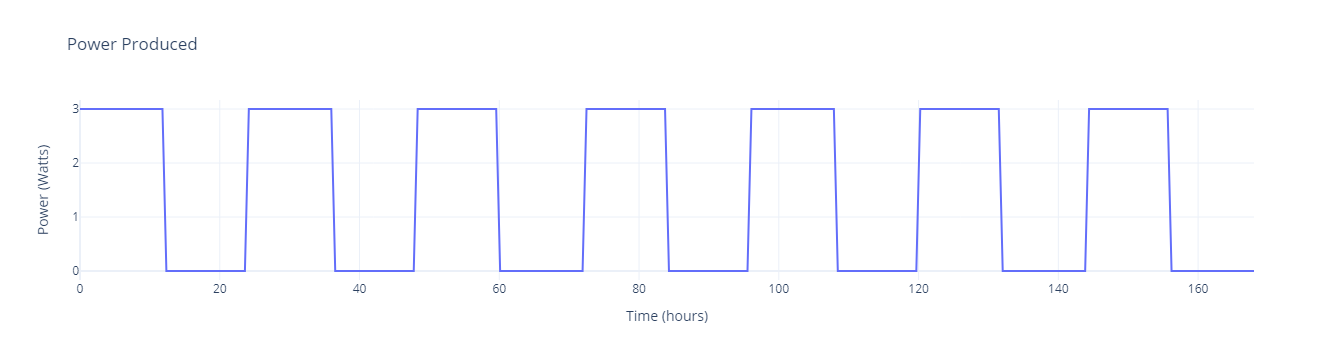

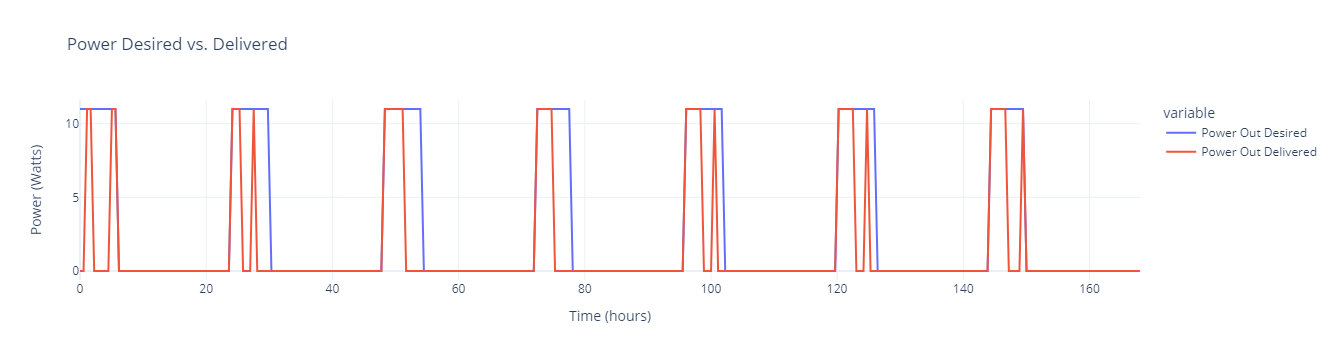

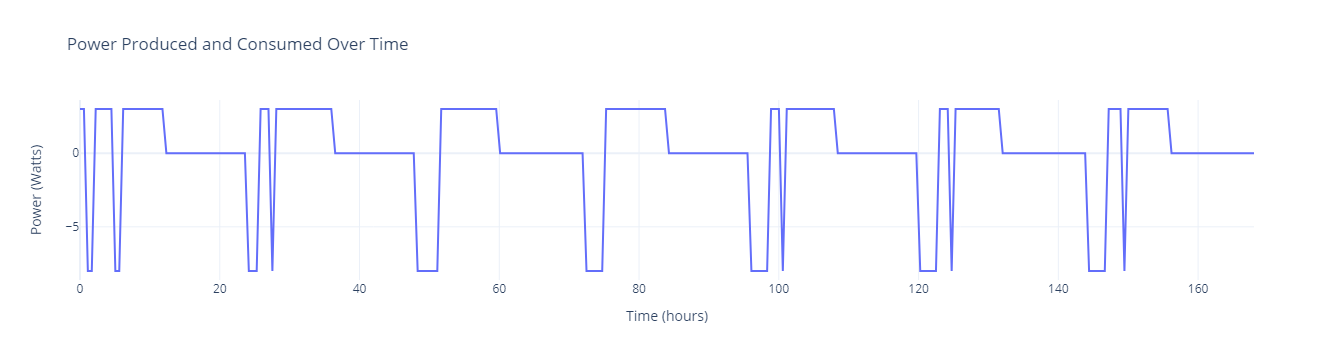

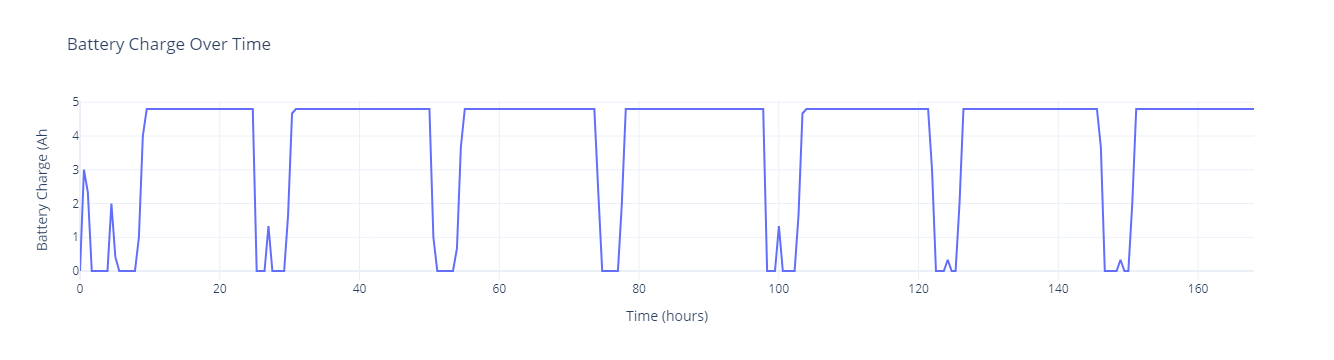

Kendall's Tau: 0.6496562413608934
P-value: 2.788587401674681e-29


# Study Configuration 2

 $$PanelCount =  2 $$

 $$BatteryCount =  3 $$

 $$SolarPanelPower= PanelPower * PanelCount =  2.5 * 2 $$

 $$BatteryCapacity = BatteryCapactiy * BatteryCount = 2.8 * 3 AH $$

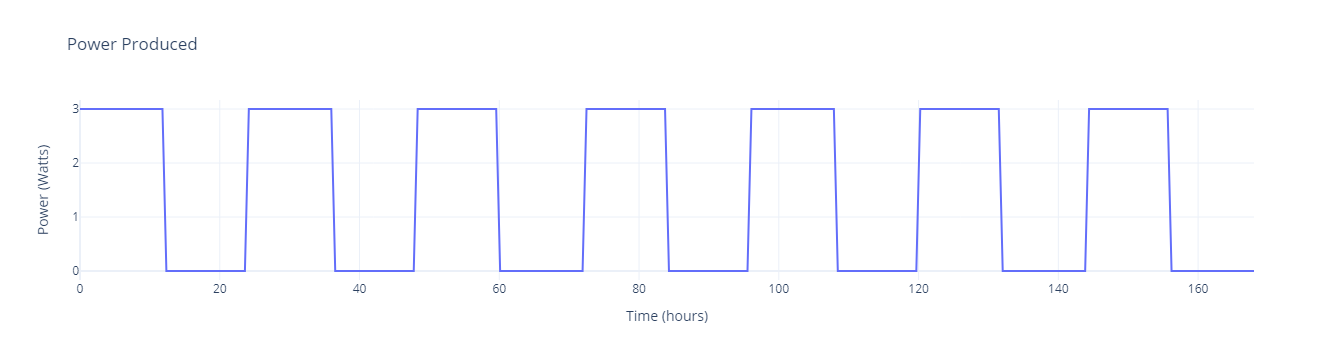

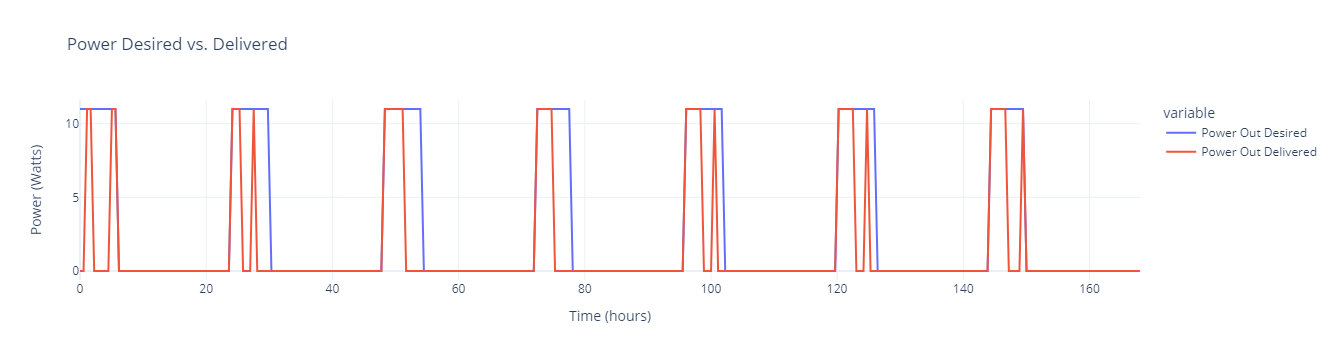

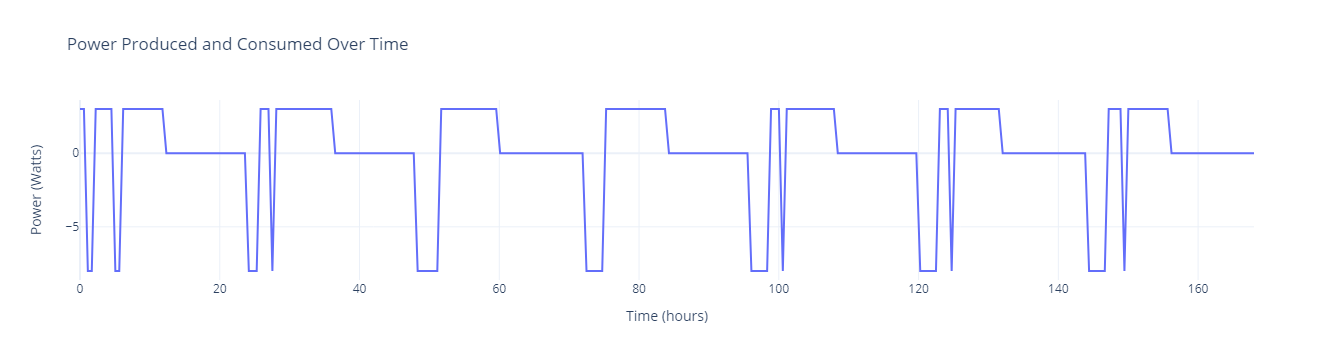

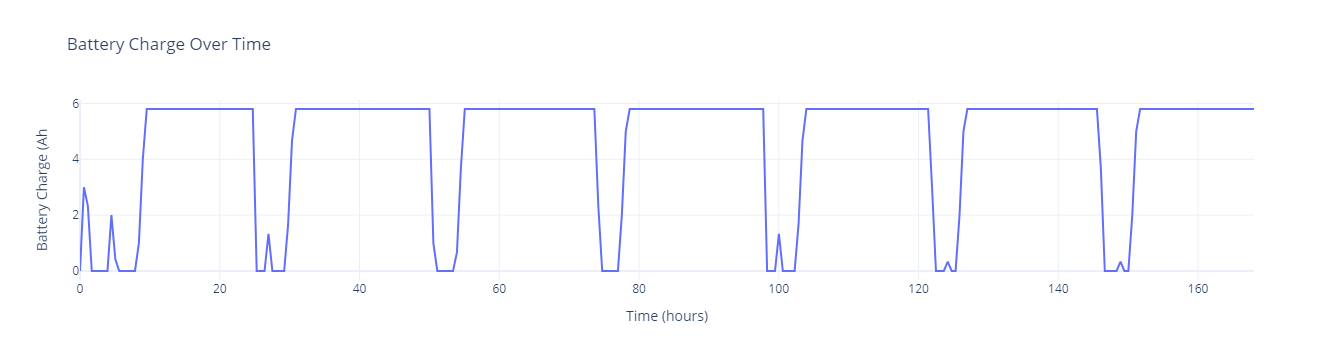

Kendall's Tau: 0.6496562413608934
P-value: 2.788587401674681e-29


# Study Configuration 3

 $$PanelCount =  2 $$

 $$BatteryCount =  4 $$

 $$SolarPanelPower= PanelPower * PanelCount =  2.5 * 2 $$

 $$BatteryCapacity = BatteryCapactiy * BatteryCount = 2.8 * 4 AH $$

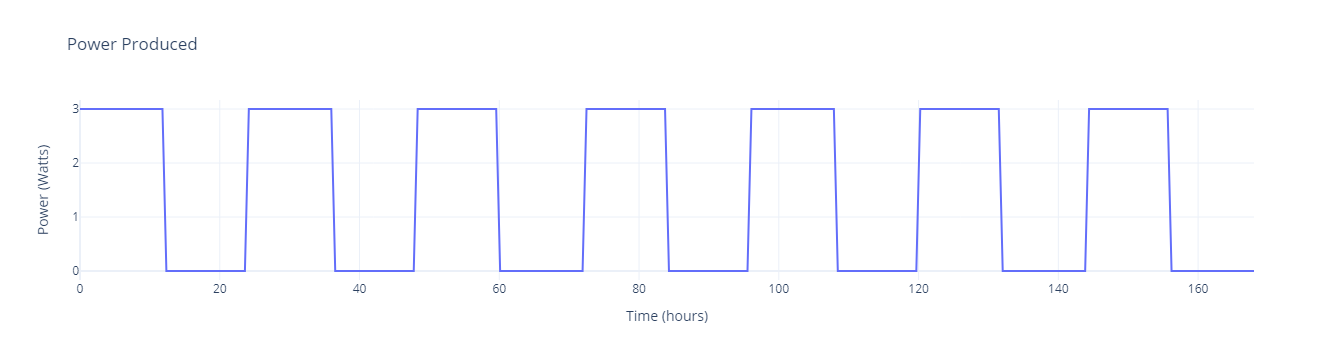

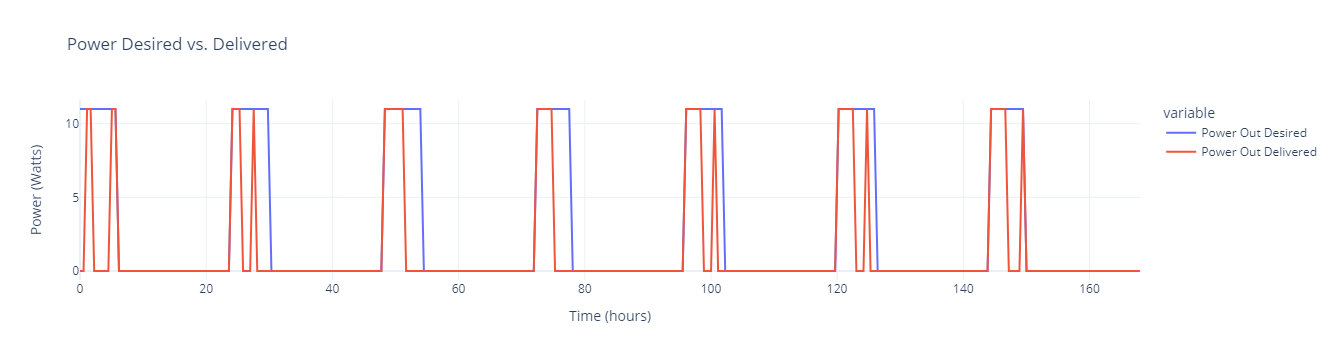

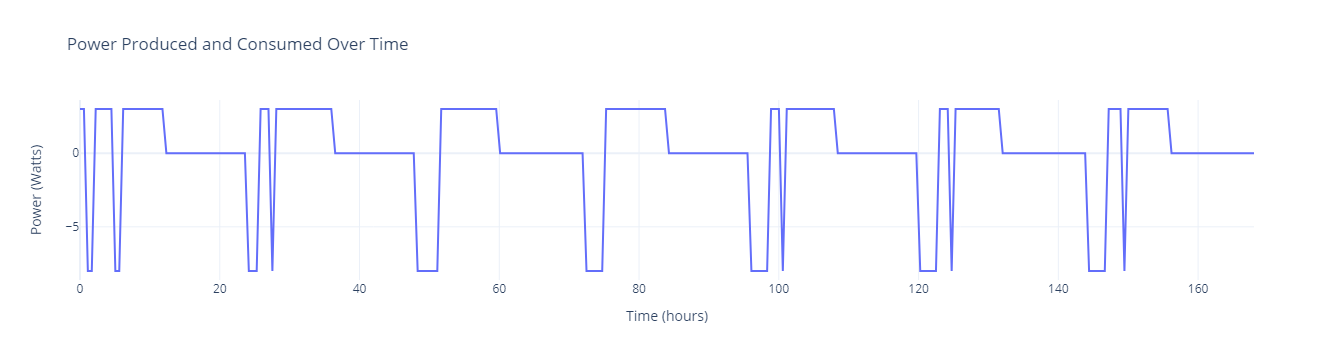

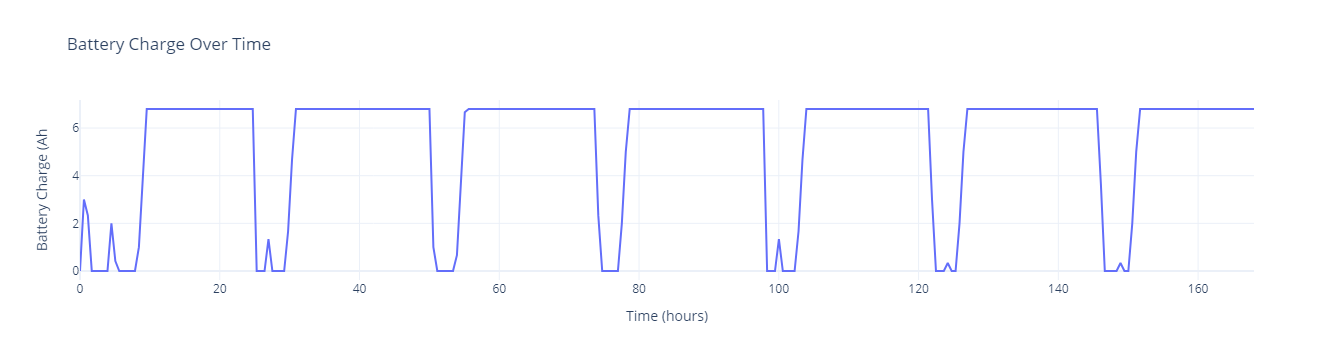

Kendall's Tau: 0.6496562413608934
P-value: 2.788587401674681e-29


# Study Configuration 4

 $$PanelCount =  3 $$

 $$BatteryCount =  2 $$

 $$SolarPanelPower= PanelPower * PanelCount =  2.5 * 3 $$

 $$BatteryCapacity = BatteryCapactiy * BatteryCount = 2.8 * 2 AH $$

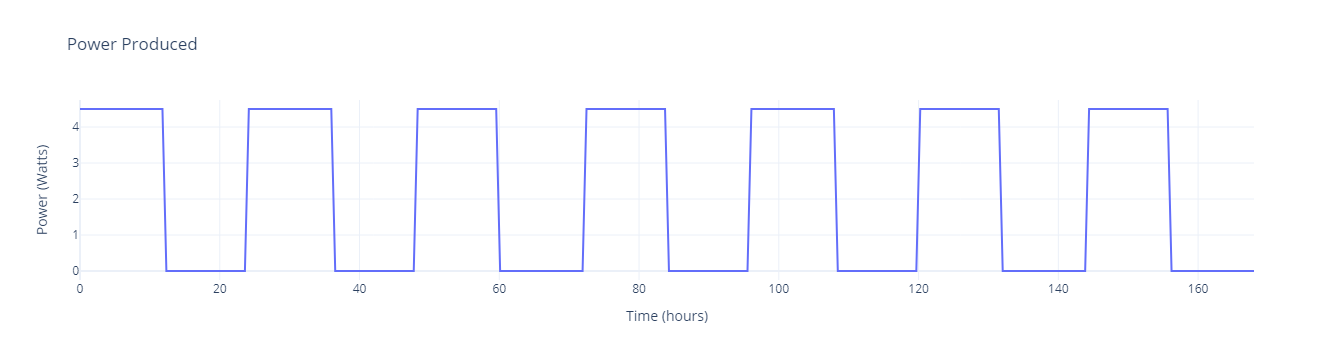

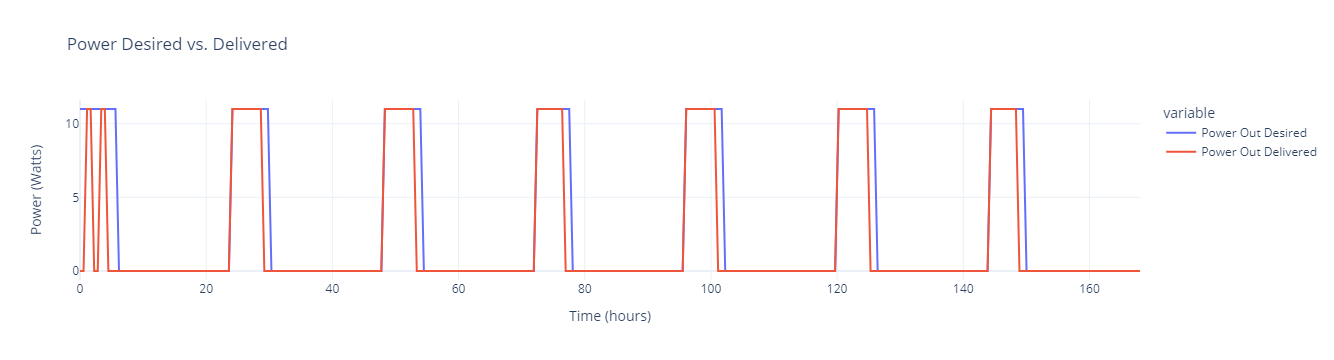

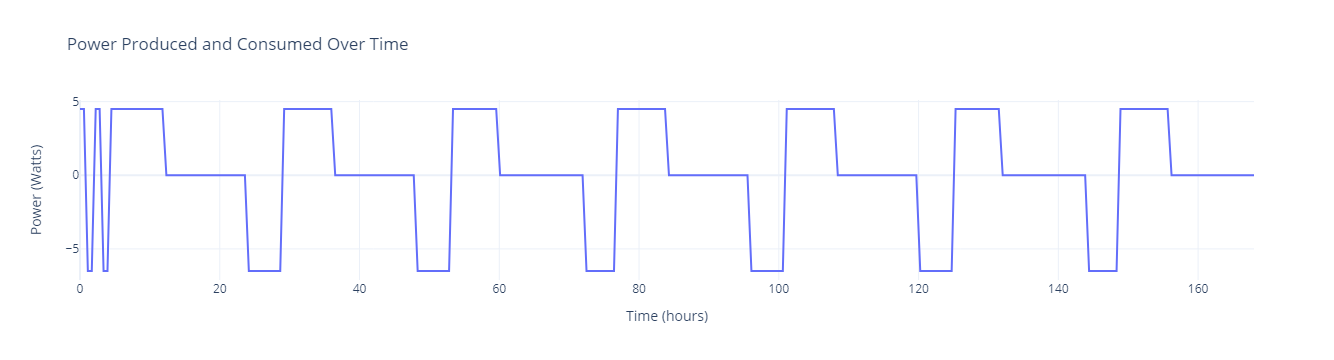

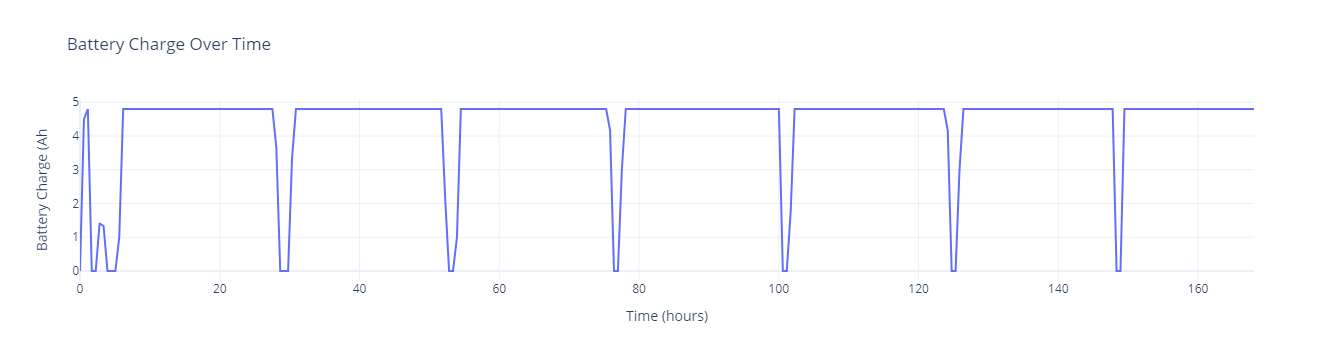

Kendall's Tau: 0.8297738186782796
P-value: 1.094477621300331e-46


# Study Configuration 5

 $$PanelCount =  3 $$

 $$BatteryCount =  3 $$

 $$SolarPanelPower= PanelPower * PanelCount =  2.5 * 3 $$

 $$BatteryCapacity = BatteryCapactiy * BatteryCount = 2.8 * 3 AH $$

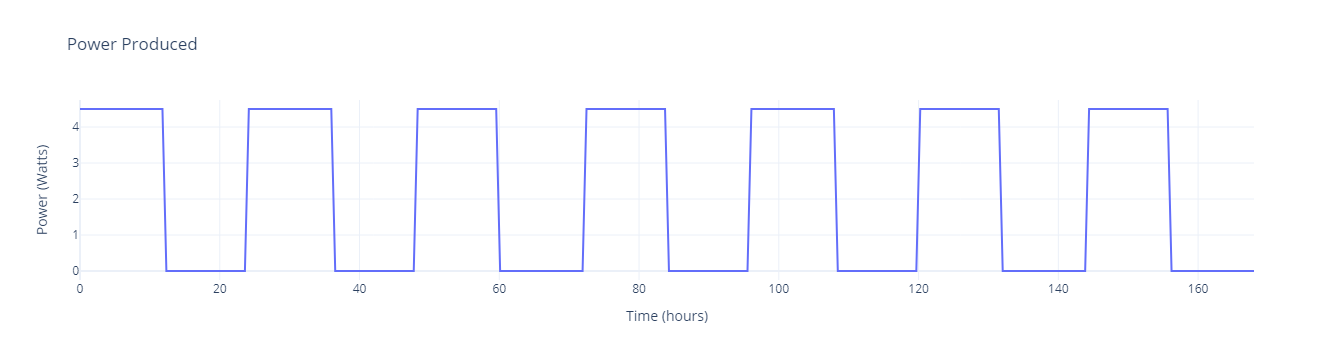

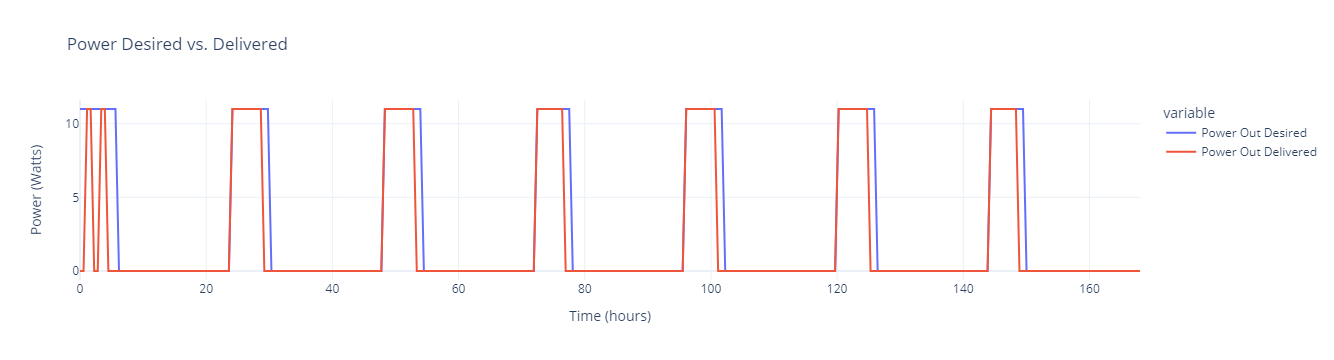

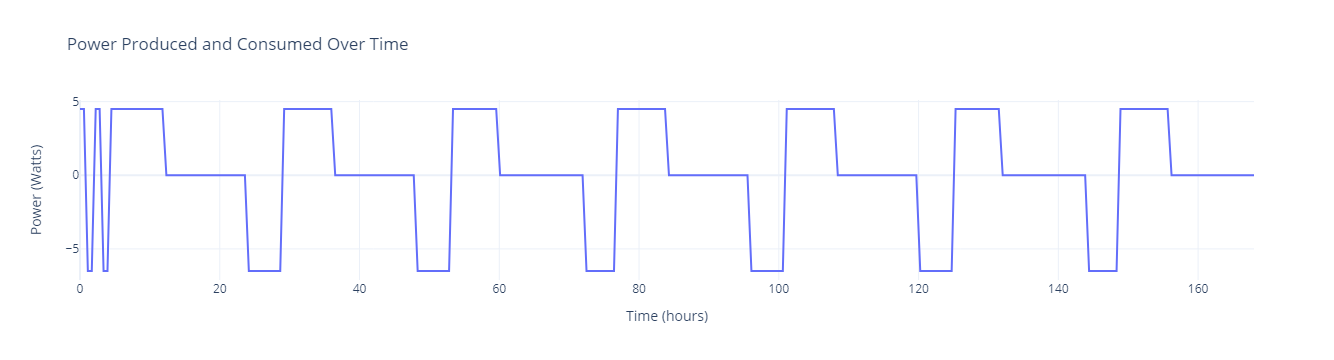

Kendall's Tau: 0.8297738186782796
P-value: 1.094477621300331e-46


# Study Configuration 6

 $$PanelCount =  3 $$

 $$BatteryCount =  4 $$

 $$SolarPanelPower= PanelPower * PanelCount =  2.5 * 3 $$

 $$BatteryCapacity = BatteryCapactiy * BatteryCount = 2.8 * 4 AH $$

Kendall's Tau: 0.8297738186782796
P-value: 1.094477621300331e-46


# Study Configuration 7

 $$PanelCount =  4 $$

 $$BatteryCount =  2 $$

 $$SolarPanelPower= PanelPower * PanelCount =  2.5 * 4 $$

 $$BatteryCapacity = BatteryCapactiy * BatteryCount = 2.8 * 2 AH $$

Kendall's Tau: 0.9555330859059091
P-value: 2.5181723285189077e-61


# Study Configuration 8

 $$PanelCount =  4 $$

 $$BatteryCount =  3 $$

 $$SolarPanelPower= PanelPower * PanelCount =  2.5 * 4 $$

 $$BatteryCapacity = BatteryCapactiy * BatteryCount = 2.8 * 3 AH $$

Kendall's Tau: 0.9555330859059091
P-value: 2.5181723285189077e-61


# Study Configuration 9

 This is the highest cost option. It has the hightest amount of solar panels and batterys.

 $$PanelCount =  4 $$

 $$BatteryCount =  4 $$

 $$SolarPanelPower= PanelPower * PanelCount =  2.5 * 4 $$

 $$BatteryCapacity = BatteryCapactiy * BatteryCount = 2.8 * 4 AH $$

Kendall's Tau: 0.9555330859059091
P-value: 2.5181723285189077e-61


In [12]:
panel_count = solar_panel_count_min 
study = 1
while panel_count <= solar_panel_count_max :
    #print("panel_count",panel_count)
    battery_count = battery_count_min
    while battery_count <= battery_count_max:
        #print("battery_count",battery_count)
        display(Markdown(f"# Study Configuration {study}"))
        if study == 1:
            display(Markdown(f" This is low cost option. It has the least amount of solar panels and batterys."))
        if study == 9:
            display(Markdown(f" This is the highest cost option. It has the hightest amount of solar panels and batterys.")) 
        display(Markdown(f" $$PanelCount =  {panel_count} $$"))
        display(Markdown(f" $$BatteryCount =  {battery_count} $$"))
        display(Markdown(f" $$SolarPanelPower= PanelPower * PanelCount =  {panel_power} * {panel_count} $$"))
        display(Markdown(f" $$BatteryCapacity = BatteryCapactiy * BatteryCount = { battery_capacity } * {battery_count} AH $$"))

        power_in_expr = power_generator(t, sun_period_value * 24/100, 24, 7*24,  panel_power*panel_count ,charger_eff)
        power_out_expr = battery_load(t , load_period_value*  24/100,  24,  7*24  ,boost_current_limit,boost_efficiency)
        #power_expr = power_in_expr -   power_out_expr
        #print(simplify(power_expr))

        
        # Substitute period value into the expression
        power_in_func = power_in_expr.subs(period, sun_period_value)
        power_out_func = power_out_expr.subs(period, sun_period_value)
        #power_func = power_expr.subs(period, sun_period_value)

        
        
        # Generate data for plotting
        t_vals = np.linspace(0, 7*24, 300)
        total_powers = []
        battery_powers =[]
        power_in = []
        power_out_desired = []
        power_out_delivered = []
        t_val_points = []
        battery_power =0 
        for t_val in t_vals:
            power_in_eval = power_in_func.evalf(subs={t: t_val})
            power_out_eval = power_out_func.evalf(subs={t: t_val})
            

            t_val_points.append(t_val)# for simpson
            power_in.append(float(power_in_eval))
            power_out_desired.append(float(power_out_eval))
            if battery_power <= 0 :
                power_out_delivered.append(float(0.0))
                total_powers.append(float(power_in_eval )) #had to covert to python float to elimnate TypeError: float() argument must be a string or a real number, not 'generator'
            else :
                power_out_delivered.append(float(power_out_eval))
                total_powers.append(float(power_in_eval - power_out_eval)) #had to covert to python float to elimnate TypeError: float() argument must be a string or a real number, not 'generator'
            battery_power= simpson( total_powers)
            if battery_power >= battery_capacity + battery_count :
                battery_power = battery_capacity + battery_count
            if battery_power <  0  :
                battery_power = 0
            battery_powers.append(float(battery_power)) #had to covert to python float to elimnate TypeError: float() argument must be a string or a real number, not 'generator'
        #print(f"Numerical Integration Result: {battery_power}")
        #print(f"Estimated Error: {error}")
        study =  study +1

        
        df = pd.DataFrame({'Time': t_vals,'Power In': power_in,'Power Out Desired':power_out_desired,'Power Out Delivered':power_out_delivered, 'Power':total_powers,'Battery Power':battery_powers})
        #print(df)
        fig = px.line(df, x='Time', y='Power In', title='Power Produced')
        
        fig.update_layout(xaxis_title='Time (hours)',
                           yaxis_title='Power (Watts)')
        # Show the plot
        fig.show()
 
        fig = px.line(df, x='Time',  y=[ 'Power Out Desired','Power Out Delivered'], title='Power Desired vs. Delivered')
        
        fig.update_layout(xaxis_title='Time (hours)',
                           yaxis_title='Power (Watts)')
        # Show the plot
        fig.show()

        
        fig = px.line(df, x='Time', y='Power', title='Power Produced and Consumed Over Time')
        
        fig.update_layout(xaxis_title='Time (hours)',
                           yaxis_title='Power (Watts)')
        # Show the plot
        fig.show()
        
        
        fig = px.line(df, x='Time', y='Battery Power', title='Battery Charge Over Time')
        
        fig.update_layout(xaxis_title='Time (hours)',
                           yaxis_title='Battery Charge (Ah')
        # Show the plot
        fig.show()   
        correlation,p_value  = kendalltau(df['Power Out Desired'],df['Power Out Delivered'])
        print(f"Kendall's Tau: {correlation}")
        print(f"P-value: {p_value}")
        battery_count = 1 + battery_count
    panel_count = 1 + panel_count
     


## Study Summary (Manual Update by Study Reviewer) 
Study results indicates that a good solution for the maximum desired use, that 4 solar panels and at least 3 batteries will meet the deired need. 